# Lab Program 10
# Data Mining 
## Name: Jerin Mathew
## Roll No: 2139455

# Outlier Detection

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')


In [2]:
df = pd.read_csv("C:/ClassesMSC/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Columns:

# age: age of primary beneficiary

# sex: insurance contractor gender, female, male

# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height
#     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

# children: Number of children covered by health insurance / Number of dependents

# smoker: Smoking

#region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

# charges: Individual medical costs billed by health insurance

In [4]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:ylabel='charges'>

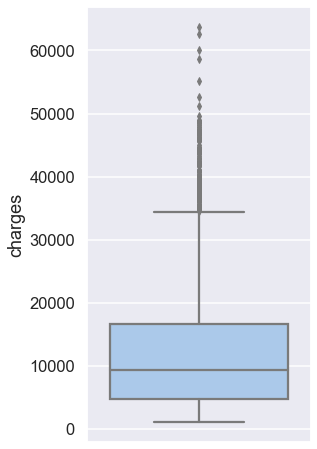

In [7]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.charges)

#### From the above box plot, we can surely observe that there are outliers in it!

# Detecting Outliers

## 1) Interquartile Range Method

In [8]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [9]:
out_iqr(df,'charges')

The IQR is 11899.625365
The lower bound value is -13109.1508975
The upper bound value is 34489.350562499996
Total number of outliers are 139


#### As per the IQR method, there are 139 outliers.

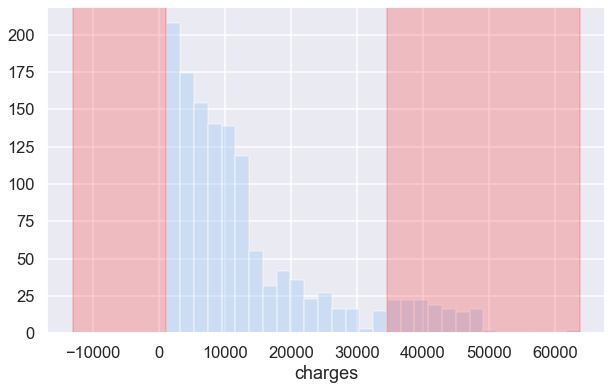

In [10]:
plt.figure(figsize = (10,6))
sns.distplot(df.charges, kde=False)
plt.axvspan(xmin = lower,xmax= df.charges.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.charges.max(),alpha=0.2, color='red')

#### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

## 2) Z-Score Method

#### Let's consider the "charges" for inspection. I'll plot a simple density plot which is one of the best visualization for detecting outliers

<AxesSubplot:xlabel='charges'>

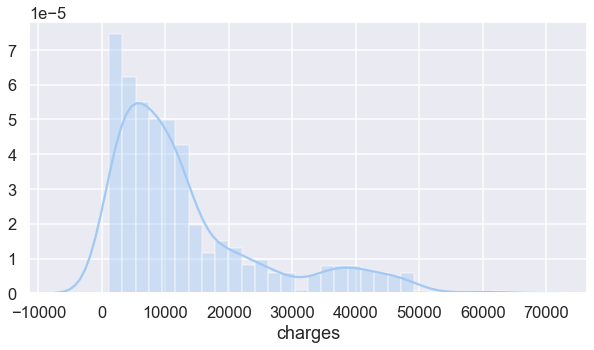

In [11]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])

### By the looks of it, it is right tailed and it surely has outliers.

In [12]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [13]:
out_zscore(df.charges)

Total number of outliers are 7


### According to z-score method, it has 7 outliers

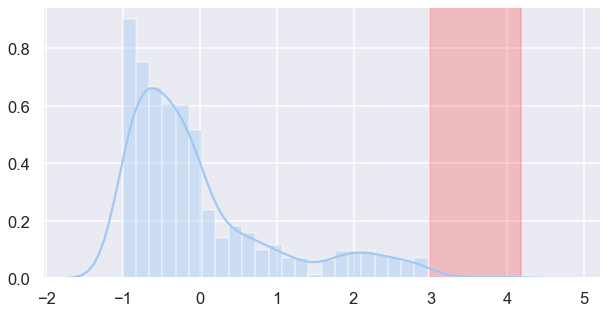

In [14]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

In [19]:
#Data Frame without outliers
df_new = df[(df['charges'] < 3) | (df['charges'] > -3)]

# Conclusion:

### While outlier removal forms an essential part of a dataset normalization, it’s important to ensure zero errors in the assumptions that influence outlier removal. Data with even significant number of outliers may not always be bad data and a rigorous investigation of the dataset in itself is often warranted, but overlooked, by data scientists in their processes.